# Doing simple classification for DeepSky Datasets.

In [351]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.grid_search import GridSearchCV
from sklearn import svm
import matplotlib.pyplot as plt
import scipy.optimize as opt
import glob
import os
import sys
%matplotlib inline

In [328]:
#sys.modules[__name__].__dict__.clear()
#Function to read the files and put in the dataframe

def readData(path):
    allFiles = glob.glob(path)
    frame = pd.DataFrame()
    list_ = []
    
    for file_ in allFiles:
        print file_
        df = pd.read_csv(file_,sep=r"\s+",header=None) #delim_whitespace=True
        #print df.shape
        #list_.append(df)
        #print df
        #print df.values.flatten()
        #print df.shape
        list_.append(df.values.flatten()[0:4500]) #flatten the matrix to arrays. Take first 4500 items only.
    #frame = pd.concat(list_)
    return pd.DataFrame(list_) #frame;

In [329]:
#path = os.getcwd() + '/data/ex1data1.txt'

#path1 = r'/home/rbhat/S3Lab Project/DL_spectra/spectra_with_feature_*.txt'
#path2 = r'/home/rbhat/S3Lab Project/DL_spectra/spectra_without_feature_*.txt'

path1 = r'/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_*.txt'
path2 = r'/home/rbhat/S3Lab Project/SubsetData/spectra_without_feature_*.txt'
frame1 = readData(path1)
frame2 = readData(path2)

#frame1.columns = ['X1', 'X2']
#frame2.columns = ['X1', 'X2']
#print frame1[4600:]
print type(frame1), frame1.shape, frame2.shape
#print frame1
#print frame2
#print np.array(frame1[4600:]).ravel()
#print frame1.head()

/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0023.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0016.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0024.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0008.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0007.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0012.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0005.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0000.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0010.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0026.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0013.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0022.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0017.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0003.txt
/home/rbhat/S3Lab Project/SubsetData/spectra_with_feature_0001

In [330]:
aa = np.array([[1,2], [3,4], [5,6], [7,8]])
print aa
print aa.shape
print aa[:,-1]  #Extract last column
#print np.array(aa).ravel()  #speed
#print np.asarray(aa).ravel() #memory
#print np.array(aa).flatten()

#http://www.datacarpentry.org/python-ecology/02-index-slice-subset
#a[start:end:step] # start through not past end, by step(default=1)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
(4, 2)
[2 4 6 8]


In [331]:
print frame1.shape, frame2.shape
frame1_Y1 = np.ones((frame1.shape[0],1))
frame1['Y'] = frame1_Y1

frame2_Y2 = np.zeros((frame2.shape[0],1))
frame2['Y'] = frame2_Y2

#print Y1.shape
#print frame1.head()
print frame1.shape, frame2.shape
print frame1_Y1
print frame2_Y2

(31, 4500) (31, 4500)
(31, 4501) (31, 4501)
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [332]:
#print frame1[9210:9229], frame2[9210:9229]
#print frame2_Y2.shape
#print frame2.head()
print frame1.shape, frame2.shape
#print frame2

#print frame2.iloc[0:1,0:5]  #slicing using iloc and loc
print frame2.loc[0:1,0:5]  #0th row, 0,1,2,3,4 th column
print frame2.loc[:,0:5] # all row, 0,1,2,3,4,5 th column

print frame1.loc[:,4495:] 
print frame2.loc[:,4495:] 

(31, 4501) (31, 4501)
           0         1          2         3          4         5
0  3583.4389  5.368597  3584.2641  5.437156  3585.0895  9.573576
1  3591.6995  3.656752  3592.5267  8.605778  3593.3540  7.480578

[2 rows x 6 columns]
            0          1          2          3          4          5
0   3583.4389   5.368597  3584.2641   5.437156  3585.0895   9.573576
1   3591.6995   3.656752  3592.5267   8.605778  3593.3540   7.480578
2   3590.0459   7.291498  3590.8726   0.791032  3591.6995   3.656065
3   3579.3157   6.317830  3580.1399   5.381432  3580.9644   5.473773
4   3592.5267  10.691812  3593.3540   5.933395  3594.1815   3.755841
5   3567.7959   4.231489  3568.6175   9.541583  3569.4393   7.733830
6   3587.5668  13.007638  3588.3930  14.688279  3589.2193  16.766228
7   3592.5267   4.687280  3593.3540   9.382336  3594.1815  12.744766
8   3561.2298   4.709154  3562.0499   4.649445  3562.8702   7.008849
9   3591.6995   3.620451  3592.5267   8.237982  3593.3540   8.290853
10

Since plotting all data, the kernel is dead. I am plotting subset of data. It is same

2000 2000
2000 2000


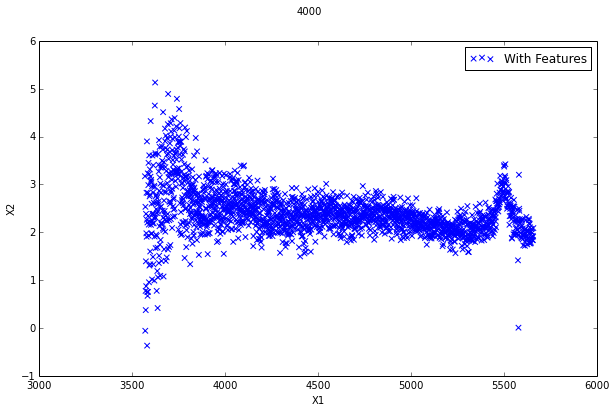

In [333]:
#frame1[0:5][0]
#Scatter plot of the data..
n = 4000 #[10, 100, 1000, 10000, 100000]
frame1_tmp = frame1.loc[0,0:n] #0th row and 0 to 4000 column of frame1
frame2_tmp = frame2.loc[0,0:n]

frame1_tmp_x = [val for i,val in enumerate(frame1_tmp) if (i%2 == 0)]
frame1_tmp_y = [val for i,val in enumerate(frame1_tmp) if (i%2 != 0)]

frame2_tmp_x = [val for i,val in enumerate(frame2_tmp) if (i%2 == 0)]
frame2_tmp_y = [val for i,val in enumerate(frame2_tmp) if (i%2 != 0)]

#print frame1_tmp_y

frame1_tmp_x = frame1_tmp_x[0:n/2]
print len(frame1_tmp_x), len(frame1_tmp_y)

frame2_tmp_x = frame2_tmp_x[0:n/2]
print len(frame2_tmp_x), len(frame2_tmp_y)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(frame1_tmp_x, frame1_tmp_y, s=30, marker='x', label='With Features')
#ax.scatter(frame2_tmp_x, frame2_tmp_y, s=30, marker='o', label='Without Features')
ax.legend()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
fig.suptitle(i)
    

In [334]:
#Looks like there is memory error on concanation and permutation because of data size. So I will take subset of 
#data. Probabily take some 60% of data.
'''
print frame1.shape[0]
n = int(frame1.shape[0]*0.3)
print n

frame11 = frame1[0:n]
frame22 = frame2[0:n]
'''

'\nprint frame1.shape[0]\nn = int(frame1.shape[0]*0.3)\nprint n\n\nframe11 = frame1[0:n]\nframe22 = frame2[0:n]\n'

In [335]:
#Combine 2 data frame and reshuffle the data randomly
#ignore_index=True will make sure it will index serially.
frame = pd.concat([frame1, frame2], ignore_index=True)

#Reshuffle the data randomly
frame = frame.reindex(np.random.permutation(frame.index))
#frame.reset_index()

print frame.shape
print frame.head()
print frame.loc[:,4495:] 
#print frame['Y'] 

(62, 4501)
           0         1          2         3          4          5          6   \
28  3583.4389  4.993551  3584.2641  5.056916  3585.0895   8.903349  3585.9151   
39  3561.2298  4.709154  3562.0499  4.649445  3562.8702   7.008849  3563.6907   
4   3609.1090  8.835992  3609.9401  4.631081  3610.7715   7.483905  3611.6030   
56  3566.1532  7.339237  3566.9745 -9.298958  3567.7959  17.139837  3568.6175   
52  3595.0091  3.588205  3595.8370  5.409704  3596.6651   5.646266  3597.4934   

          7          8         9          10        11         12        13  \
28  5.411823  3586.7409  6.721302  3587.5668  8.424660  3588.3930 -0.360423   
39  6.016525  3564.5113  5.115266  3565.3322  7.977494  3566.1532  3.564401   
4   7.567561  3612.4347  7.588903  3613.2665  7.990626  3614.0986  7.850843   
56  5.040870  3569.4393 -5.856838  3570.2613  4.400600  3571.0835  6.686936   
52  5.175020  3598.3218  2.759103  3599.1504  8.308013  3599.9793  6.924621   

           14        15    

Now splitting data in training and testing for classification purpose. We split 70% for training set and 30% for testing set. After that we do classification on the given astronomy datasets.

In [336]:
#Splitting the data for classification purpose..
#Input dataframe consists of X1, X2
#print frame.shape
#print frame.iloc[:,9273:]
X = frame.drop(['Y'],axis=1) 
#print X.iloc[:,9273:]

print X.shape

#Output vector(predictor/response) vector
Y = frame['Y']

print Y.shape
#Splitting data into train and testing. 70% Training and 30% Testing..
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

(62, 4500)
(62,)


In [337]:
print X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

#Validating the number
#print 101390*0.7, 101390*0.3 

(43, 4500) (43,) (19, 4500) (19,)


Some of the algorithm for logistic regression. Algorithm from Andrew Ng machine learning class.

## Logistic Regression

In [316]:
#Logistic Regression algorithm

#Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Prediction
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1.0 if x >= 0.5 else 0.0 for x in probability]

#Cost calculation with regularization
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    print X.shape, y.shape, theta.shape
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg
    
#Gradient calculation with regularization
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad



In [281]:
# add a ones column - this makes the matrix multiplication work out easier
#print X.head()
#print Y.head()

X_tmp = X
Y_tmp = Y
print X_tmp.head()
X_tmp.insert(0,'Ones',1)
print X_tmp.head()

           0          1          2         3          4          5   \
10  3612.4347 -20.972565  3613.2665  3.825174  3614.0986   6.726816   
3   3566.1532   7.131698  3566.9745 -9.035796  3567.7959  16.654399   
6   3590.0459   7.291498  3590.8726  0.791032  3591.6995   3.656065   
7   3591.6995   3.620451  3592.5267  8.237982  3593.3540   8.290853   
0   3590.0459   5.862934  3590.8726  0.635818  3591.6995   2.937599   

           6          7          8          9          10        11  \
10  3614.9309  12.394925  3615.7634  10.458275  3616.5960  5.368757   
3   3568.6175   4.897989  3569.4393  -5.690701  3570.2613  4.275673   
6   3592.5267   7.430761  3593.3540   6.948455  3594.1815  4.295185   
7   3594.1815   4.662978  3595.0091   3.852455  3595.8370  9.175366   
0   3592.5267   5.968313  3593.3540   5.578865  3594.1815  3.447295   

           12        13         14        15         16        17         18  \
10  3617.4289  5.691490  3618.2619  7.192939  3619.0951  4.682623 

Since the optimization algorithm only uses ndarray type and no matrix type we need to change it to array. Also theta should be flatten other wise it gives wierd error.

In [288]:
X_tmp = np.array(X_tmp)
Y_tmp1 = np.matrix(Y_tmp)
Y_tmp = np.array(Y_tmp1.T)
theta_tmp = np.zeros(X_tmp.shape[1])

print  X_tmp.shape, Y_tmp.shape, theta_tmp.shape
print type(X_tmp), type(Y_tmp), type(theta_tmp)

(12, 4501) (1, 12) (4501,)
<type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'>


In [292]:

print costReg(theta_tmp, X_tmp, Y_tmp, 0)
    
print gradientReg(theta_tmp, X_tmp, Y_tmp, 0)

#Looks like fmin_tnc only take ndarray type, no matrix or whatsoever...
result = opt.fmin_tnc(func=costReg, x0=theta_tmp, fprime=gradientReg, args=(X_tmp,Y_tmp, 0) )
                                                                            
print result


(12, 4501) (1, 12) (1, 4501)
8.31776616672
[  0.00000000e+00   7.57912251e-14   2.96059473e-16 ...,   1.11022302e-16
   1.51582450e-13   1.11022302e-16]
(12, 4501) (1, 12) (1, 4501)
(12, 4501) (1, 12) (1, 4501)
(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 1, 0)


Now using the algorithm above, it calculates the accuracy. Accuracy seems bit low somehow.

In [321]:
#Accuracy
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X_tmp)
print type(list(Y_tmp)), type(predictions)
print predictions
print Y_tmp.tolist()
print zip(predictions, Y_tmp)
correct =  (predictions==Y_tmp.tolist())#[1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y_tmp.tolist())]
print correct
accuracy = (sum(map(int, correct)) / float(len(correct)))
#print 'accuracy = {0}%'.format(accuracy)
print 'accuracy = {0}%'.format(accuracy*100)

<type 'list'> <type 'list'>
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0]]
[(1.0, array([ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.]))]
False


TypeError: argument 2 to map() must support iteration

Now in below code, the polynomial feature is added for classification. This is done by taking polynomial power of each original column X1 & X2 and removing the original columns.

In [322]:
#Increasing the features..adding more polynomials term
degree = 5

#Reseting this variable
#%reset_selective frame_log
#%reset frame_log

frame_log = frame
x1 = frame_log['X1']
x2 = frame_log['X2']

print frame_log.head()
#print x1.head()
#print x2.head()

#Insert at 0th column, Ones column name and value as 1
frame_log.insert(3, 'Ones', 1) 
print frame_log.head()



KeyError: u'no item named X1'

In [24]:
for i in range(1, degree):
    for j in range(0, i):
        frame_log['X_' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

frame_log.drop('X1', axis=1, inplace=True)
frame_log.drop('X2', axis=1, inplace=True)

frame_log.head()

,Y,Ones,X_10,X_20,X_21,X_30,X_31,X_32,X_40,X_41,X_42,X_43
228531,0,1,6295.0618,3.962780e+07,32857.719050,2.494595e+11,2.068414e+08,171504.225926,1.570363e+15,1.302079e+12,1.079630e+09,895183.852102
154117,0,1,5578.2760,3.111716e+07,6279.887011,1.735801e+11,3.503094e+07,7069.743568,9.682778e+14,1.954123e+11,3.943698e+07,7958.944807
161293,0,1,10032.2880,1.006468e+08,10357.358209,1.009718e+12,1.039080e+08,10692.961472,1.012978e+16,1.042435e+12,1.072749e+08,11039.439087
240697,0,1,4325.1383,1.870682e+07,66073.502907,8.090959e+10,2.857770e+08,1009379.928123,3.499452e+14,1.236025e+12,4.365708e+09,15419915.616329
255884,0,1,5964.8565,3.557951e+07,24410.367585,2.122267e+11,1.456043e+08,99896.124177,1.265902e+15,8.685090e+11,5.958660e+08,408811.362257


In [25]:
# set X and y (remember from above that we moved the label to column 0)
cols = frame_log.shape[1]
X2 = frame_log.iloc[:,1:cols]
y2 = frame_log.iloc[:,0:1]

print X2.head()
print y2.head()

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)


        Ones        X_10          X_20          X_21          X_30  \
228531     1   6295.0618  3.962780e+07  32857.719050  2.494595e+11   
154117     1   5578.2760  3.111716e+07   6279.887011  1.735801e+11   
161293     1  10032.2880  1.006468e+08  10357.358209  1.009718e+12   
240697     1   4325.1383  1.870682e+07  66073.502907  8.090959e+10   
255884     1   5964.8565  3.557951e+07  24410.367585  2.122267e+11   

                X_31            X_32          X_40          X_41  \
228531  2.068414e+08   171504.225926  1.570363e+15  1.302079e+12   
154117  3.503094e+07     7069.743568  9.682778e+14  1.954123e+11   
161293  1.039080e+08    10692.961472  1.012978e+16  1.042435e+12   
240697  2.857770e+08  1009379.928123  3.499452e+14  1.236025e+12   
255884  1.456043e+08    99896.124177  1.265902e+15  8.685090e+11   

                X_42             X_43  
228531  1.079630e+09    895183.852102  
154117  3.943698e+07      7958.944807  
161293  1.072749e+08     11039.439087  
240697  4.

In [26]:
print X2.shape, y2.shape, theta2.shape
print type(X2), type(y2), type(theta2)

(285988, 11) (285988, 1) (11,)
<type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'>


In [27]:
learningRate = 1 #0.000001
print costReg(theta2, X2, y2, learningRate)
print gradientReg(theta2, X2, y2, learningRate)

0.693147180563
[  0.00000000e+00   3.68297206e-14   9.11822597e-12   1.36991193e+03
   4.78633876e-06   7.87212382e+06   1.09936057e+04  -3.51330301e-02
   4.75060811e+10   5.90362937e+07   8.27758228e+04]


In [28]:
#Not sure why all theta value is 0, search failed..????
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
print result2
print opt.tnc.RCSTRINGS[4]

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 68, 4)
Linear search failed


In [29]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print 'accuracy = {0}%'.format(accuracy*100)

accuracy = 50.0%


## Logistic Regression (Sklearn)

In [338]:
#Logistic Regression-sklearn
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)
Y_logPred = logReg.predict(X_test)
print metrics.accuracy_score(Y_test,Y_logPred)

0.684210526316


Confusion matrix of the model.

In [339]:
#Confusion matrix of logistic regression
conf = metrics.confusion_matrix(Y_test,Y_logPred)
#plt.imshow(conf)
print conf

[[7 0]
 [6 6]]


In [340]:
#Accuracy calculation other way..
(9453+9901)/float(9453+9901+5733+5330)

0.6362889173817273

## K-Neighbors 

In [341]:
# KNeighbours classification
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print metrics.accuracy_score(Y_test, Y_pred)
conf = metrics.confusion_matrix(Y_test, Y_pred)
#plt.imshow(conf)
print conf

0.368421052632
[[ 5  2]
 [10  2]]


In [342]:
(7776+8397)/float(7776+8397+7432+6812)

0.5317092415425584

## Random Forest

In [343]:
#Random Forest Classification
randForest = RandomForestClassifier(n_estimators=30)
randForest.fit(X_train,Y_train)
Y_randForestPred = randForest.predict(X_test)
print metrics.accuracy_score(Y_test,Y_randForestPred)

0.842105263158


In [344]:
#Confusion matrix for randomforest
conf2 = metrics.confusion_matrix(Y_test,Y_randForestPred)
#plt.imshow(conf2)
print conf2

[[7 0]
 [3 9]]


In [345]:
(9569+9086)/float(9569+9086+5639+6123)

0.613308347305783

## Support vector machine

In [346]:
#Support Vector Machine
svc = svm.LinearSVC(C=10, loss='hinge', max_iter=1000)
svc

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [347]:
svc.fit(X_train,Y_train)
svc.score(X_test, Y_test)

0.36842105263157893